In [61]:
import numpy as np



perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [62]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)  # ** 무작위로 train set 과 test set을 만들어 준다

train_input=train_input.reshape(-1,1) # ** 2d array로 변환
test_input=test_input.reshape(-1,1)  # ** 2d array로 변환


In [63]:
from sklearn.neighbors import KNeighborsRegressor  # ** K 최근접 이웃 회귀를 위한 class를 import

knr=KNeighborsRegressor(n_neighbors=3) # ** 위에서 import한 class의 객체를 만들고 k값을 3으로 설정

knr.fit(train_input,train_target)  # ** knr를 train



KNeighborsRegressor(n_neighbors=3)

In [64]:
print(knr.predict([[50]])) # ** knr는 2차원 배열이니 함수 값도 2차원 array로 보내야함 -> 회귀이기 때문에 가까운 3개의 이웃의 평균값을 R^2로 return

[1033.33333333]


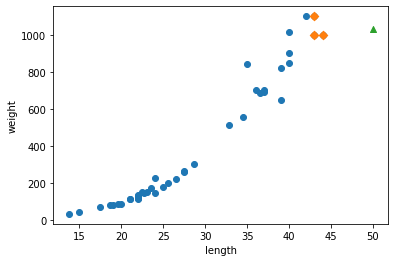

In [65]:
import matplotlib.pyplot as plt # ** 산점도 fnc를 그리기 위한 class import

distances,indexes=knr.kneighbors([[50]])  # ** 50과 가까운 3개 이웃의 인덱스와 거리를 구함

plt.scatter(train_input,train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(50,1033,marker='^') 
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [66]:
print(np.mean(train_target[indexes]))  # ** knr.predict([[50]])의 값과 같음 -> 회귀이므로 k개의 인접 이웃의 평균을 값으로 가짐

1033.3333333333333


In [67]:
print(knr.predict([[100]]))  # ** K 최근접 이웃 회귀의 한계 -> train set의 x범위를 벗어나도 위의 값과 동일한 y value를 예측

[1033.33333333]


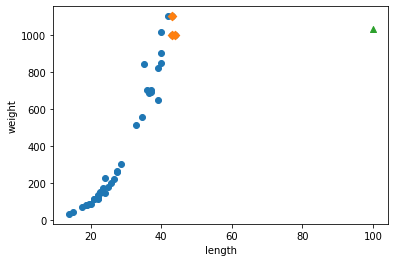

In [68]:
distances,indexes=knr.kneighbors([[100]])

plt.scatter(train_input,train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression  #** 선형 회귀 알고리즘 사용을 위한 class를 import

lr=LinearRegression() # ** 위에서 import 한 class의 객체를 생성

lr.fit(train_input,train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [70]:
print(lr.coef_,lr.intercept_)  # **   선형 회귀 알고리즘의 class를 통해 y=ax+b , 즉 직선의 방정식? 을 얻으면 a와b는 lr 객체의 coef_ 와 intercept_ 속성에 저장됨

[39.01714496] -709.0186449535474


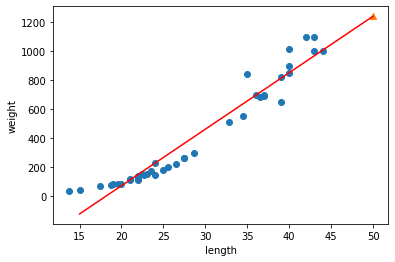

In [71]:
plt.scatter(train_input,train_target)

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_],'r')  # ** 15<=x<=50 까지 1차 방정식 그래프를 그린다

plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [72]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9398463339976041
0.824750312331356


In [73]:
print(train_input[0:5])

print(train_target[0:5])

print(train_input.shape)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]
[ 85. 135.  78.  70. 700.]
(42, 1)


In [74]:
train_poly=np.column_stack((train_input**2,train_input)) # ** 곡선 함수를 그리기 위해서 제곱한 것과 기존 데이터를 나란히 이어 붙인다  곡선의 방정식이 y=ax^2+bx+c 이런 식이니까 
test_poly=np.column_stack((test_input**2,test_input))
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [75]:
print(train_poly[0:5])
print("---------------------")
print(test_poly[0:5])

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
---------------------
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]


In [76]:
lr=LinearRegression() # ** 선형 회귀 객체 생성
lr.fit(train_poly,train_target)  # ** 훈련할 때 주목할 점은 target 값에는 변화가 없다는 것이다


print(lr.predict([[50**2,50]]))

[1573.98423528]


In [77]:
print(train_poly[0:5],test_poly)

print(train_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]] [[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [1892.25   43.5 ]
 [ 262.44   16.2 ]
 [ 784.     28.  ]
 [ 745.29   27.3 ]]
(42, 2)


In [78]:
print(lr.coef_,lr.intercept_)  # ** 2차 방정식이므로 coef 값은 두개임

[  1.01433211 -21.55792498] 116.0502107827827


<function matplotlib.pyplot.show(close=None, block=None)>

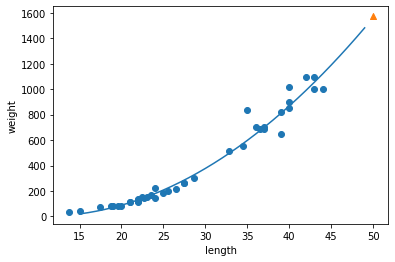

In [79]:
point=np.arange(15,50) # ** 1을 구간으로 한 구간별 직선을 그리기 위한 정수 배열 만듦

plt.scatter(train_input,train_target) # ** 훈련 세트의 산점도를 그린다

plt.plot(point,1.01*point**2-21.6*point+116.05)  # ** 2차 곡선을 그림 a,b,c 값은 coef 값 2개 y절편 1개=intercept

plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show


In [80]:
print(lr.score(train_poly,train_target))

print(lr.score(test_poly,test_target))

# ** 결과값을 보면 아직 과소적합이 있음 -> 좀더 복잡한 model이 필요함 

0.9706807451768623
0.9775935108325122
